In [1]:
import datetime;
import logging;
import datetime;
import os;
from time import time, sleep;

import numpy as np;
import pandas as pd;



from sklearn import model_selection;
from sklearn import metrics;
from sklearn.metrics import make_scorer;

from sklearn import preprocessing;
from sklearn import datasets;

from sklearn.dummy import DummyClassifier;
from sklearn.decomposition import KernelPCA;

from sklearn.feature_selection import SelectKBest, chi2, f_classif;

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV;

from sklearn import linear_model;
from sklearn.svm import SVC;
from sklearn.ensemble import RandomForestClassifier, VotingClassifier;

from sklearn.base import BaseEstimator, TransformerMixin;
from sklearn.pipeline import make_pipeline, FeatureUnion;

from sklearn.feature_extraction.text import CountVectorizer;

import matplotlib;
import matplotlib.pyplot as plt;
import matplotlib.style as style;

import seaborn as sns;

from itertools import chain;

In [2]:
def convert2pandas_df(x_array=None, y=None, feature_names=None, target_name=None):
    ''' list of datasets part of the sklearn ''';

    assert x_array.shape[1] == len(feature_names);  # assert the length of x_array and column label length are same;
    assert x_array.shape[0] == len(y); # The target length should equal the features length;
    assert isinstance(y, list); # Target should of the type list;
    assert isinstance(feature_names, list); # feature_names should of the type list;

    data_dict = {};
    data_dict[target_name] = y;

    for i, col_name in enumerate(feature_names):
        data_dict[col_name] = list(chain.from_iterable( x_array[:, [i]] ));

    return pd.DataFrame(data_dict);

In [3]:
#1 Load Cancer dataset
cancer_data_dict = datasets.load_breast_cancer();
cancer_data_pd = convert2pandas_df(x_array=cancer_data_dict['data'],
                y=[ cancer_data_dict['target_names'][i] for i in cancer_data_dict['target'] ],
                  # feature_names=iris_dict['feature_names'],
                feature_names=list(cancer_data_dict['feature_names']), target_name='Target');
cancer_data_pd

,Target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


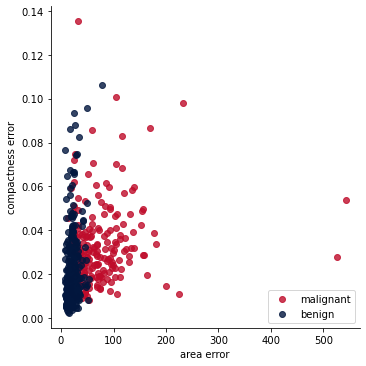

In [4]:
sns.lmplot( x="area error", y="compactness error", data=cancer_data_pd, fit_reg=False, hue='Target', legend=False,
            palette=dict(malignant="#BF0C2B", benign="#02173E")); # , versicolor="#F5900E"));
plt.legend(loc='lower right');

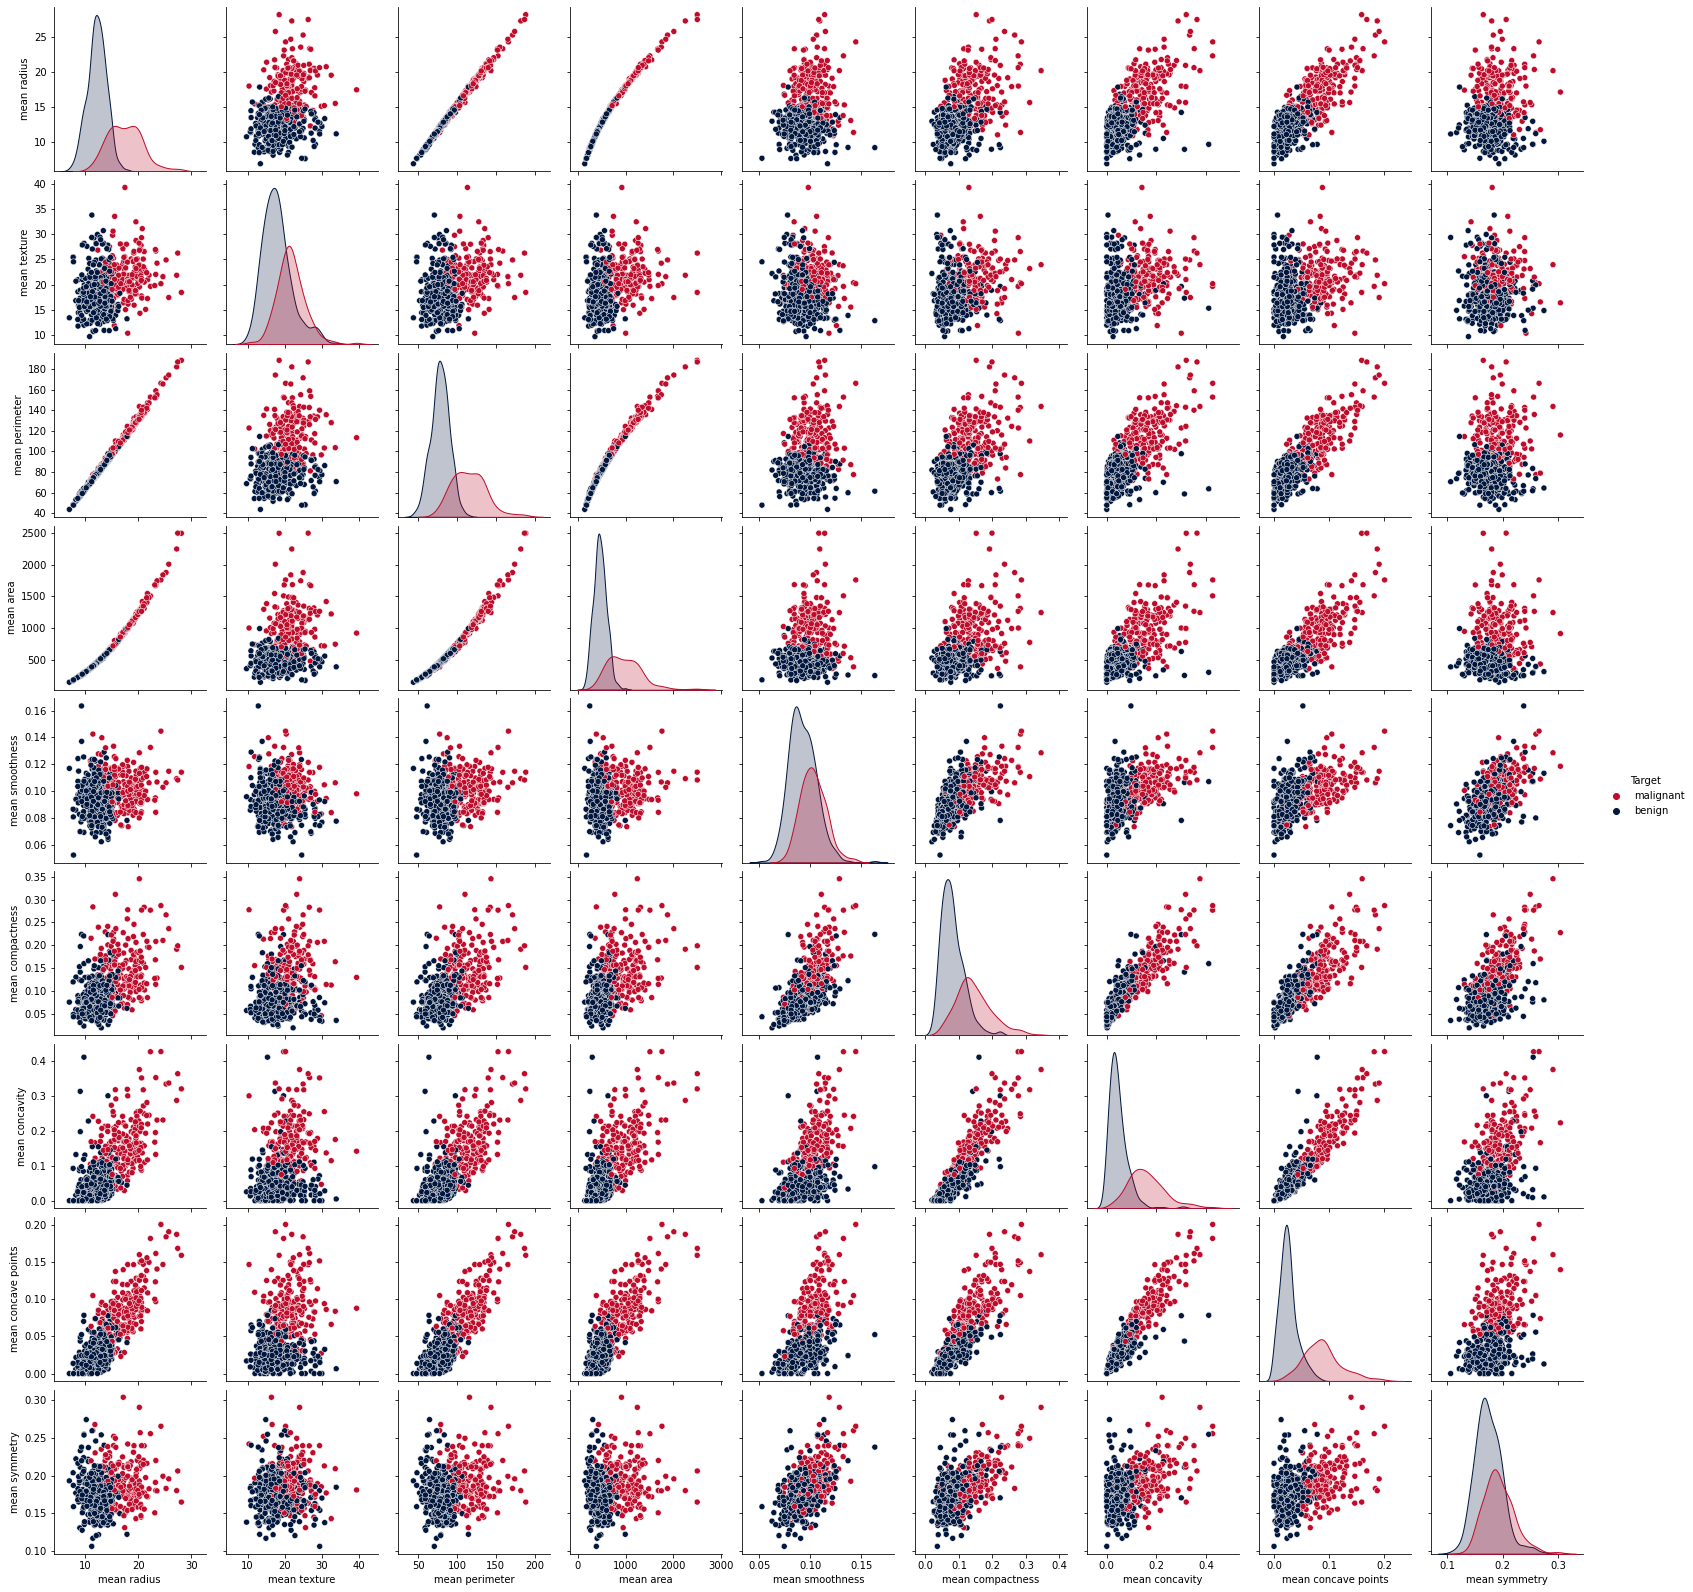

In [5]:
selected_columns = ['Target', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
                        'mean concave points', 'mean symmetry'];
g = sns.pairplot(cancer_data_pd[selected_columns], hue="Target", diag_kind="kde",  palette=dict(malignant="#BF0C2B", benign="#02173E"), diag_kws=dict(shade=True));

In [19]:
#2 Train test split
#split dataset based on target distribution
X_train, X_test, y_train, y_test = train_test_split(cancer_data_pd[cancer_data_dict.feature_names],
                                                    # cancer_data_pd['Target'],
                                                    cancer_data_dict['target'], # Has to be binary for scorer F1 and Percision;
                                                    test_size=0.20,
                                                    # stratify=cancer_data_pd['Target'],
                                                    stratify=cancer_data_dict['target'],
                                                    random_state=111,
                                                    shuffle=True);
print(f'X_train.shape : {X_train.shape}');
print(f'X_test.shape  : {X_test.shape}');
print(f'Y_train.shape : {y_train.shape}');
print(f'Y_test.shape  : {y_test.shape}');

X_train.shape : (455, 30)
X_test.shape  : (114, 30)
Y_train.shape : (455,)
Y_test.shape  : (114,)


In [7]:
#3 DummyRegressors and Classifiers
# to get the base model performance score
dummy_classifier = DummyClassifier(strategy="most_frequent");

In [25]:
#4 Cross_over_score and predict and Metrics (make_scorer) to avoid the model overfitting
# Model performance metrics
def cost_accuracy(actual, prediction):
    """ Custom accuracy cost function to be used in the scorer """;
    # accuracy = correct predictions / total predictions
    assert len(actual) == len(prediction);
    return round((np.sum(actual == prediction) / len(actual)) , 4);
accuracy_scorer = make_scorer(cost_accuracy, greater_is_better=True);

#KFold and CrossVal Score/Predict
kfold = model_selection.KFold(n_splits=10, random_state=111, shuffle=True);
results = model_selection.cross_val_score(dummy_classifier, X_train, y_train, cv=kfold, scoring=accuracy_scorer);
DummyClassifier_mean = np.mean(results);

print(f'{results} {np.mean(results)} {np.var(results)} {np.std(results)}');

[0.6304 0.6087 0.6522 0.7826 0.587  0.6    0.5111 0.6667 0.6    0.6222] 0.62609 0.004327450899999999 0.06578336339835475


In [21]:
#5 Standardization
#scale the input features so not a single feature bias the model
std_scaler = preprocessing.MinMaxScaler(); # Range between 0 to 1; No negative terms;
std_scaler = std_scaler.fit(X_train);
scaled_X_train = pd.DataFrame(std_scaler.transform(X_train), columns=X_train.columns);

print(f'{X_train["mean radius"].describe()}');
print(f'{scaled_X_train["mean radius"].describe()}');

count    455.000000
mean      14.166378
std        3.541795
min        7.691000
25%       11.725000
50%       13.340000
75%       15.750000
max       28.110000
Name: mean radius, dtype: float64
count    455.000000
mean       0.317125
std        0.173456
min        0.000000
25%        0.197561
50%        0.276654
75%        0.394681
max        1.000000
Name: mean radius, dtype: float64


In [22]:
#6 SelectKBest
#select K best input features based on a feature selection metrics
selectKbest_est = SelectKBest(f_classif, k=8);
selectKbest_X_train = selectKbest_est.fit_transform(X_train, y_train);

print(f'{selectKbest_est.get_params(deep=True)}');
print(f'{selectKbest_est.get_support(indices=False)}');
print(f'{selectKbest_est.get_support(indices=True)}');
print(f'{X_train.columns[selectKbest_est.get_support(indices=True)]}');

{'k': 8, 'score_func': <function f_classif at 0x000001EC1B86BB80>}
[ True False  True  True False False False  True False False False False
 False False False False False False False False  True False  True  True
 False False False  True False False]
[ 0  2  3  7 20 22 23 27]
Index(['mean radius', 'mean perimeter', 'mean area', 'mean concave points',
       'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')


In [27]:
#7 Polynomial feature generation
#Polynomial feature along with the interaction terms
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False, interaction_only=False);
X_train_poly = poly.fit_transform(X_train);
X_train_p2 = pd.DataFrame(X_train_poly, columns=poly.get_feature_names(X_train.columns));

lr = linear_model.LogisticRegression(fit_intercept=False, random_state=111);
results = model_selection.cross_val_score(lr, X_train_p2, y_train, cv=kfold, scoring=accuracy_scorer); # , verbose=True);
imp_percentage = round((np.mean(results) - DummyClassifier_mean) / DummyClassifier_mean, 4);

print(f'DummyClassifier accuracy : {DummyClassifier_mean}');
print(f'LogisticRegression accuracy : {np.mean(results)}');
print(f'The improvement over the DummyClassifier is : {imp_percentage}');

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

DummyClassifier accuracy : 0.62609
LogisticRegression accuracy : 0.96485
The improvement over the DummyClassifier is : 0.5411


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [28]:
#8 Kernel PCA — Principal component analysis (Decomposition)
#reduce the number dimention preserving the variance across dimensions
kernel_param = ('rbf', 1);
kpca = KernelPCA(n_components=4, kernel=kernel_param[0], gamma=kernel_param[1], 
                 fit_inverse_transform=True, random_state=111)     
kpca.fit(scaled_X_train);   # The data has to be scaled;
kpca_X_train = kpca.transform(scaled_X_train);

lr = linear_model.LogisticRegression(fit_intercept=False, random_state=111);
results = model_selection.cross_val_score(lr, kpca_X_train, y_train, cv=kfold, scoring=accuracy_scorer); # , verbose=True);
imp_percentage = round((np.mean(results) - DummyClassifier_mean) / DummyClassifier_mean, 4);

print(f'DummyClassifier accuracy : {DummyClassifier_mean}');
print(f'LogisticRegression accuracy : {np.mean(results)}');
print(f'The improvement over the DummyClassifier is : {imp_percentage}');

DummyClassifier accuracy : 0.62609
LogisticRegression accuracy : 0.9274699999999999
The improvement over the DummyClassifier is : 0.4814


In [29]:
#9 GridSearch Cross validation
#parameter fine-tuning with cross validation
tuning_parameters = [{'n_estimators' : [1, 10], 'max_depth' : [10, 20],
                      'max_features' : [0.80, 0.40], 'random_state' : [111]}];
clf = GridSearchCV(RandomForestClassifier(), tuning_parameters, 
                   cv=5, scoring=accuracy_scorer);
clf.fit(X_train, y_train);

print(f'Best parameters set found on development set: {clf.best_score_} {clf.best_params_}');
print('');
print('Grid scores on development set:');
print('');
means = clf.cv_results_['mean_test_score'];
stds = clf.cv_results_['std_test_score'];
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f'{round(mean,3)} (+/-{round(std*2,2)}) for {params}');
print('');

print('Detailed classification report:');
print('');
print('The model is trained on the full development set.');
print('The scores are computed on the full evaluation set.');
print('');
y_true, y_pred = y_test, clf.predict(X_test);
print(f'{metrics.classification_report(y_true, y_pred)}');
print('');

imp_percentage = round((clf.best_score_ - DummyClassifier_mean) / DummyClassifier_mean, 4);
print(f'DummyClassifier accuracy : {DummyClassifier_mean}');
print(f'GridSearchCV RandomForestClassifier accuracy : {clf.best_score_}');
print(f'The improvement over the DummyClassifier is : {imp_percentage}');

Best parameters set found on development set: 0.94506 {'max_depth': 10, 'max_features': 0.8, 'n_estimators': 10, 'random_state': 111}

Grid scores on development set:

0.914 (+/-0.01) for {'max_depth': 10, 'max_features': 0.8, 'n_estimators': 1, 'random_state': 111}
0.945 (+/-0.02) for {'max_depth': 10, 'max_features': 0.8, 'n_estimators': 10, 'random_state': 111}
0.925 (+/-0.04) for {'max_depth': 10, 'max_features': 0.4, 'n_estimators': 1, 'random_state': 111}
0.941 (+/-0.02) for {'max_depth': 10, 'max_features': 0.4, 'n_estimators': 10, 'random_state': 111}
0.914 (+/-0.01) for {'max_depth': 20, 'max_features': 0.8, 'n_estimators': 1, 'random_state': 111}
0.945 (+/-0.02) for {'max_depth': 20, 'max_features': 0.8, 'n_estimators': 10, 'random_state': 111}
0.925 (+/-0.04) for {'max_depth': 20, 'max_features': 0.4, 'n_estimators': 1, 'random_state': 111}
0.941 (+/-0.02) for {'max_depth': 20, 'max_features': 0.4, 'n_estimators': 10, 'random_state': 111}

Detailed classification report:

Th

In [14]:
#10 Custom estimator
#Custom tranformer to include the custom logic
class ColumnTypeFilter(BaseEstimator, TransformerMixin):
    """ Custom transformer to select all columns of a particular type in a pandas dataframes """;
    def __init__(self, dtype):
        self.dtype = dtype;
    def fit(self, X, y=None):
        return self;
    def transform(self, X):
        assert isinstance(X, pd.DataFrame);
        return X.select_dtypes(include=[self.dtype]);
    
ctf = ColumnTypeFilter(np.number);
ctf.fit_transform(X_train).head();

In [30]:
#11 Preprocessing pipeline
#cross validation to avoid the model overfitting
custom_pipeline = make_pipeline(
            FeatureUnion(transformer_list=[
                ('StdScl', make_pipeline(
                    ColumnTypeFilter(np.number),
                    preprocessing.StandardScaler()
                )),
                ('MMScl', make_pipeline(
                    ColumnTypeFilter(np.number),
                    preprocessing.MinMaxScaler()
                ))
            ])
    );
custom_pipeline.fit(X_train);
X_test_transformed = custom_pipeline.transform(X_test);

print(f'{X_test.shape} {type(X_test_transformed)} {X_test_transformed.shape}');

(114, 30) <class 'numpy.ndarray'> (114, 60)


In [31]:
#12 Ensemble models
#voting classifier to ensemble multiple classifiers output; should have a predictproba method
lr = linear_model.LogisticRegression(fit_intercept=False, random_state=111);
ensemble_clf = VotingClassifier(estimators=[('dummy', dummy_classifier),
                            ('logistic', lr),('rf', RandomForestClassifier())],
                            voting='soft');
ensemble_clf.fit(X_train, y_train);
ensemble_clf_accuracy_ = cost_accuracy(y_test, ensemble_clf.predict(X_test));
imp_percentage = round((ensemble_clf_accuracy_ - DummyClassifier_mean) / DummyClassifier_mean, 4);

print(f'DummyClassifier accuracy : {DummyClassifier_mean}');
print(f'GridSearchCV RandomForestClassifier accuracy : {ensemble_clf_accuracy_}');
print(f'The improvement over the DummyClassifier is : {imp_percentage}');

DummyClassifier accuracy : 0.62609
GridSearchCV RandomForestClassifier accuracy : 0.9474
The improvement over the DummyClassifier is : 0.5132


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#13 Handling categorical and text input features
#label encoders and one-hot encoders for the categorical features
baby_names = ['Ava', 'Lily', 'Noah', 'Jacob', 'Mia', 'Sophia'];
X_train_list = [ np.random.choice(baby_names) for i in range(40) ];
X_test_list = [ np.random.choice(baby_names) for i in range(6) ];

bb_labelencoder = preprocessing.LabelEncoder();
bb_labelencoder.fit(X_train_list);
bb_encoded = bb_labelencoder.transform(X_test_list);

bb_onehotencoder = preprocessing.OneHotEncoder(sparse=False);
bb_encoded = bb_encoded.reshape(len(bb_encoded), 1);
bb_onehot = bb_onehotencoder.fit_transform(bb_encoded);

for i, v in enumerate(X_test_list):
    print(f'Actual : {v} \t | LabelEncoded : {bb_encoded[i][0]} \t | OneHot : {bb_onehot[i]}');

Actual : Lily 	 | LabelEncoded : 2 	 | OneHot : [1. 0. 0.]
Actual : Noah 	 | LabelEncoded : 4 	 | OneHot : [0. 1. 0.]
Actual : Sophia 	 | LabelEncoded : 5 	 | OneHot : [0. 0. 1.]
Actual : Sophia 	 | LabelEncoded : 5 	 | OneHot : [0. 0. 1.]
Actual : Noah 	 | LabelEncoded : 4 	 | OneHot : [0. 1. 0.]
Actual : Noah 	 | LabelEncoded : 4 	 | OneHot : [0. 1. 0.]


In [33]:
#14 Feature Extraction (From image and text)
#count and TFIDF vectorizers for text feature extractions
corpus = [  'This is the first document.',
            'This document is the second document.',
            'And this is the third one.',
            'Is this the first document?', ]

vectorizer = CountVectorizer();
X = vectorizer.fit_transform(corpus);
cntvector_out = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names());

for i, v in enumerate(corpus):
    print(f'Input text : {v}');
    print(f'Output counter vector : {v}');
    print(f'{cntvector_out.iloc[i]}');

Input text : This is the first document.
Output counter vector : This is the first document.
and         0
document    1
first       1
is          1
one         0
second      0
the         1
third       0
this        1
Name: 0, dtype: int64
Input text : This document is the second document.
Output counter vector : This document is the second document.
and         0
document    2
first       0
is          1
one         0
second      1
the         1
third       0
this        1
Name: 1, dtype: int64
Input text : And this is the third one.
Output counter vector : And this is the third one.
and         1
document    0
first       0
is          1
one         1
second      0
the         1
third       1
this        1
Name: 2, dtype: int64
Input text : Is this the first document?
Output counter vector : Is this the first document?
and         0
document    1
first       1
is          1
one         0
second      0
the         1
third       0
this        1
Name: 3, dtype: int64
